# Relatório de Análise VIII

## Identificando e removendo Outliers

In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [59]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


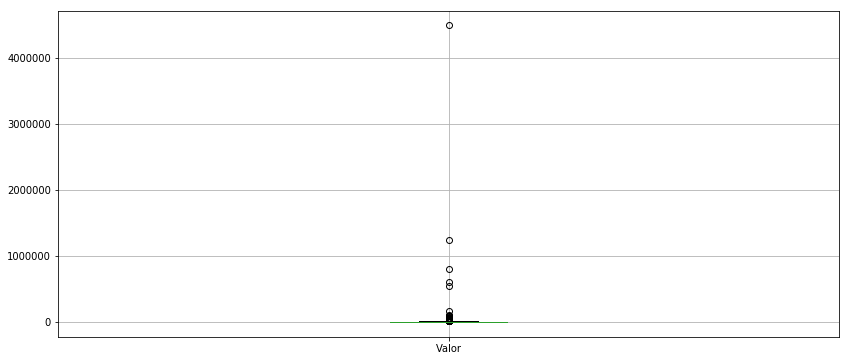

In [60]:
dados.boxplot(['Valor'])

In [61]:
dados[dados['Valor']>50000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
121,Apartamento,Ipanema,4,6,1,700,65000.0,8860.0,5699.0,92.86,Apartamento
1220,Casa de Condomínio,Barra da Tijuca,5,8,5,1150,60000.0,2000.0,1700.0,52.17,Casa
2251,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,599.0,92.86,Apartamento
4863,Apartamento,Ipanema,5,3,4,806,90000.0,9170.0,6000.0,111.66,Apartamento
4962,Apartamento,Ipanema,4,1,4,470,55000.0,7500.0,3200.0,117.02,Apartamento
5584,Apartamento,Leblon,4,2,2,650,51000.0,7000.0,0.0,78.46,Apartamento
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
9392,Apartamento,Ipanema,4,2,2,467,55000.0,8000.0,0.0,117.77,Apartamento
9838,Apartamento,Ipanema,5,3,4,800,90000.0,9188.0,60230.0,112.50,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa


In [62]:
valor = dados['Valor']

In [63]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [64]:
selecao = (valor>=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

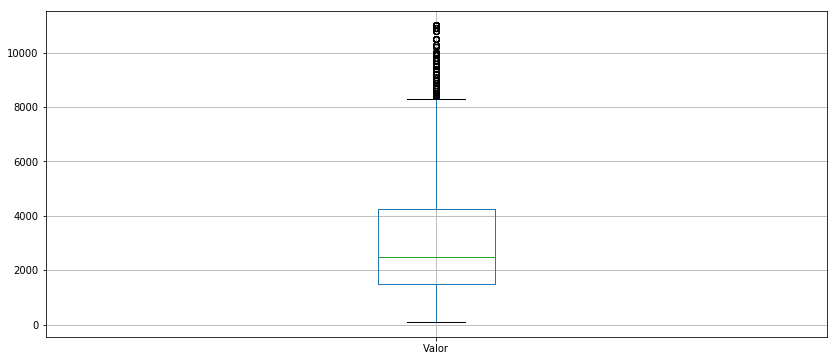

In [65]:
dados_new.boxplot('Valor')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E29C0EF98>]],
      dtype=object)

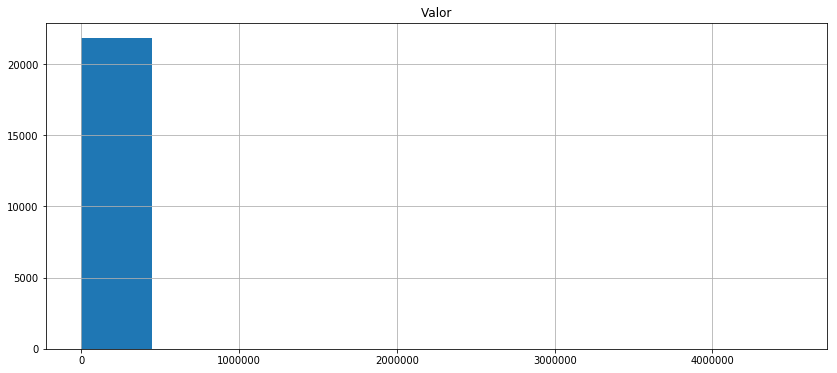

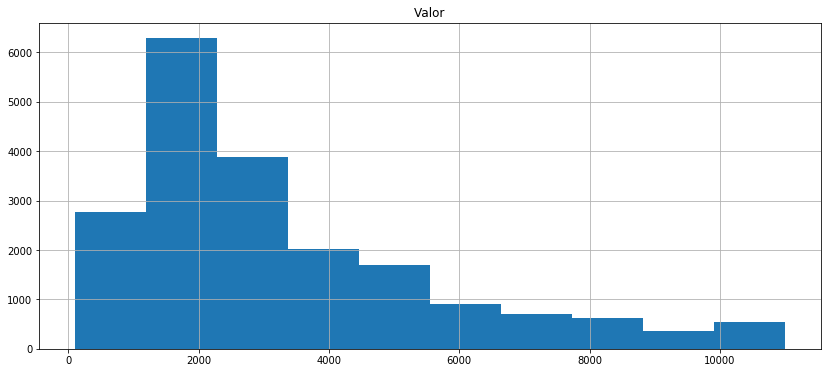

In [66]:
dados.hist('Valor')
dados_new.hist('Valor')

In [67]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


In [68]:
valor = dados['Valor m2']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(f'Q1->{Q1}\n\rQ3->{Q3}\n\rIIQ->{IIQ}\n\rlimite_inferior->{limite_inferior}\n\rlimite_superior->{limite_superior}')

Q1->21.25
Q3->42.31
IIQ->21.060000000000002
limite_inferior->-10.340000000000003
limite_superior->73.9


## Identificando e removendo Outliers (parte 2)

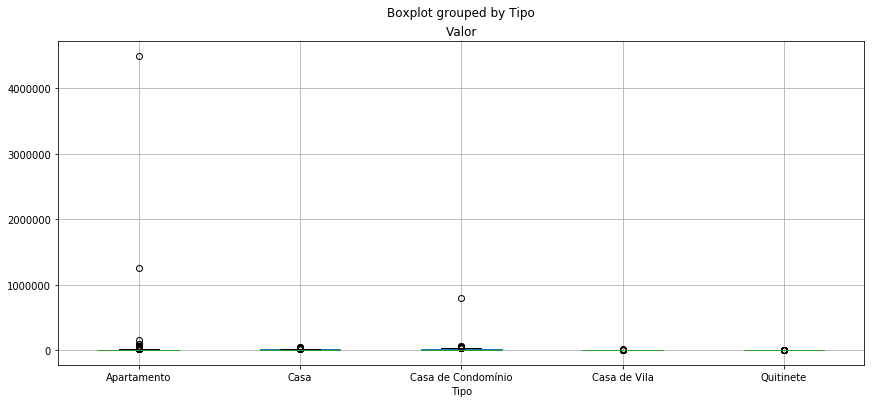

In [69]:
dados.boxplot(['Valor'],by='Tipo')

In [70]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [71]:
grupo_tipo.groups

{'Apartamento': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
            dtype='int64', length=8613),
 'Casa': Int64Index([  13,   31,   50,   54,   74,  109,  115,  123,  127,  172,
             ...
             9667, 9723, 9750, 9783, 9831, 9861, 9870, 9888, 9894, 9903],
            dtype='int64', length=426),
 'Casa de Condomínio': Int64Index([  69,   71,   72,   76,   93,  117,  118,  122,  128,  215,
             ...
             9657, 9670, 9689, 9691, 9746, 9770, 9784, 9898, 9920, 9981],
            dtype='int64', length=454),
 'Casa de Vila': Int64Index([  23,   53,   91,  269,  444,  627,  809,  836,  871, 1081,
             ...
             9132, 9177, 9239, 9260, 9264, 9345, 9601, 9707, 9889, 9959],
            dtype='int64', length=117),
 'Quitinete': Int64Index([  28,   45,   57,   65,   67,  137,  155,  162,  174,  222,
             ...
             9647, 

In [72]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(f'Q1->{Q1}\n\rQ3->{Q3}\n\rIIQ->{IIQ}\n\rlimite_inferior->{limite_inferior}\n\rlimite_superior->{limite_superior}')

Q1->Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64
Q3->Tipo
Apartamento            5000.0
Casa                   9000.0
Casa de Condomínio    16000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64
IIQ->Tipo
Apartamento            3300.0
Casa                   7900.0
Casa de Condomínio    12075.0
Casa de Vila           1000.0
Quitinete               600.0
Name: Valor, dtype: float64
limite_inferior->Tipo
Apartamento           -3250.0
Casa                 -10750.0
Casa de Condomínio   -14187.5
Casa de Vila           -700.0
Quitinete                 0.0
Name: Valor, dtype: float64
limite_superior->Tipo
Apartamento            9950.0
Casa                  20850.0
Casa de Condomínio    34112.5
Casa de Vila           3300.0
Quitinete              2400.0
Name: Valor, dtype: float64


In [73]:
limite_superior['Casa']

20850.0

In [74]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo']==tipo
    eh_dentro_limite = (dados['Valor']>=limite_inferior[tipo]) & (dados['Valor']<=limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento
10,Apartamento,Pechincha,1,1,0,54,1200.0,347.0,0.0,22.22,Apartamento


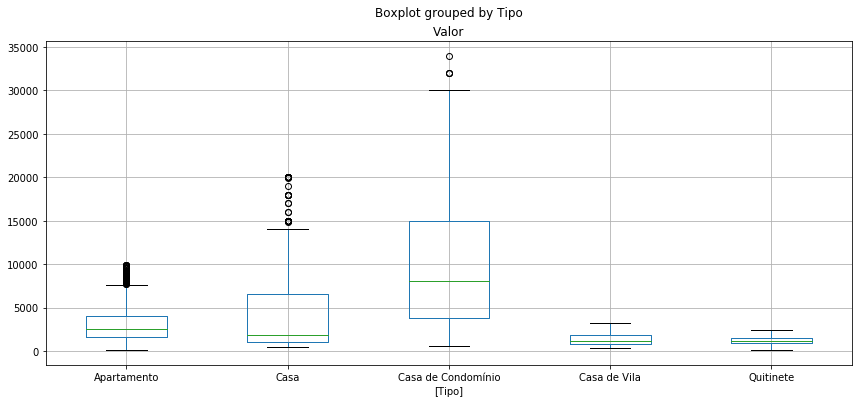

In [75]:
dados_new.boxplot(['Valor'],by=['Tipo'])

In [76]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv',sep=';',index=False)

## Extra

In [77]:
area = plt.figure()

<Figure size 1008x432 with 0 Axes>

In [78]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [79]:
g1.scatter(dados['Valor'],dados['Area'])
g1.set_title('Valor x Area')


Text(0.5, 1.0, 'Valor x Area')

In [80]:
g2.hist(dados['Valor'])
g2.set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

In [81]:
dados_g3 = dados['Valor'].sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra Valor')

Text(0.5, 1.0, 'Amostra Valor')

In [82]:
grupo = dados.groupby('Tipo')['Valor']
g4.bar(grupo.mean().index,grupo.mean().values)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

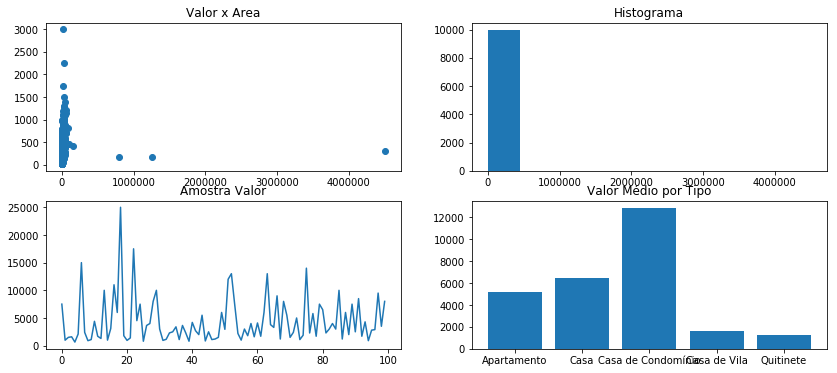

In [83]:
area